## 0. Index

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

# 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Josepa Cusidó\EU_Drugs_Wastewater\02 Data\Wastewater drug residues_CLEAN.csv', index_col = False)

In [4]:
df.shape

(2316, 16)

In [5]:
df.head()

,Unnamed: 0,year,metabolite,SiteID,country,city,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,0,2021,amphetamine,AT001,AT,Graz,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57
1,1,2021,amphetamine,AT002,AT,Hall-Wattens,8.37,7.08,6.88,4.25,6.17,8.25,7.77,7.74,6.39,6.97
2,2,2021,amphetamine,AT004,AT,Innsbruck,16.59,16.72,17.60,24.92,29.69,22.38,26.24,19.85,23.65,22.02
3,3,2021,amphetamine,AT005,AT,Kapfenberg,25.01,24.11,30.52,31.85,36.75,35.58,22.43,23.85,33.68,29.46
4,4,2021,amphetamine,AT007,AT,Kufstein,24.24,16.19,19.70,10.93,22.68,20.69,24.18,21.54,18.50,19.80


In [6]:
df = df.drop(columns=['Unnamed: 0','metabolite','country','city','SiteID'])

In [7]:
df.head()

,year,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,2021,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57
1,2021,8.37,7.08,6.88,4.25,6.17,8.25,7.77,7.74,6.39,6.97
2,2021,16.59,16.72,17.60,24.92,29.69,22.38,26.24,19.85,23.65,22.02
3,2021,25.01,24.11,30.52,31.85,36.75,35.58,22.43,23.85,33.68,29.46
4,2021,24.24,16.19,19.70,10.93,22.68,20.69,24.18,21.54,18.50,19.80


# 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

[-669736335.8147191,
 -220189237.55937007,
 -128844810.33998562,
 -88131175.01474878,
 -73878315.256906,
 -60730689.79838633,
 -49956216.31304966,
 -43535402.03784474,
 -38133642.994999915]

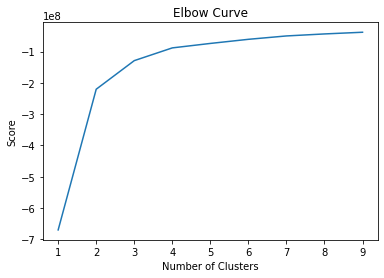

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from one to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is four.

# 3. k-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
df['clusters'] = kmeans.fit_predict(df)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df.head()

,year,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean,clusters
0,2021,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57,0
1,2021,8.37,7.08,6.88,4.25,6.17,8.25,7.77,7.74,6.39,6.97,0
2,2021,16.59,16.72,17.60,24.92,29.69,22.38,26.24,19.85,23.65,22.02,0
3,2021,25.01,24.11,30.52,31.85,36.75,35.58,22.43,23.85,33.68,29.46,0
4,2021,24.24,16.19,19.70,10.93,22.68,20.69,24.18,21.54,18.50,19.80,0


In [15]:
df['clusters'].value_counts()

0    1713
2     371
1     171
3      61
Name: clusters, dtype: int64

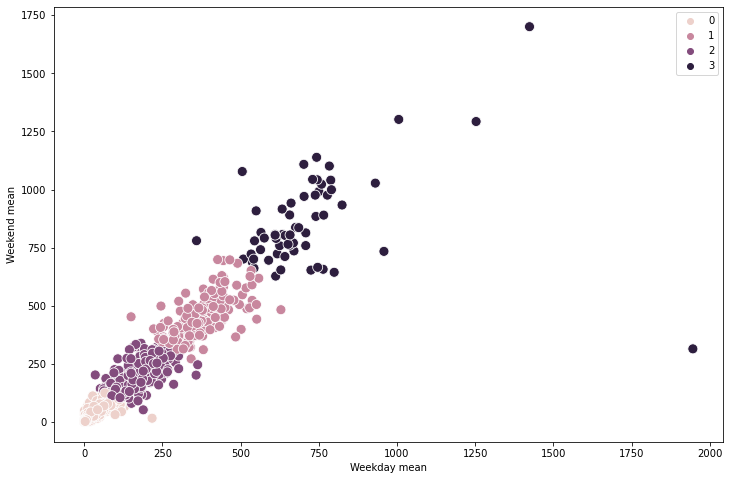

In [18]:
# Plot the clusters for the "Weekday mean" and "Weekend mean" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Weekday mean'], y=df['Weekend mean'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Weekday mean') # Label x-axis.
plt.ylabel('Weekend mean') # Label y-axis.
plt.show()

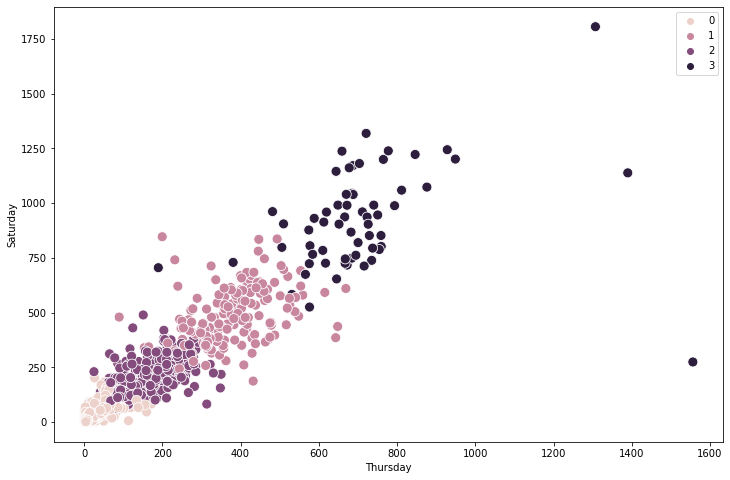

In [19]:
# Plot the clusters for the "Thursday" and "Saturday" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Thursday'], y=df['Saturday'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Thursday') 
plt.ylabel('Saturday') 
plt.show()

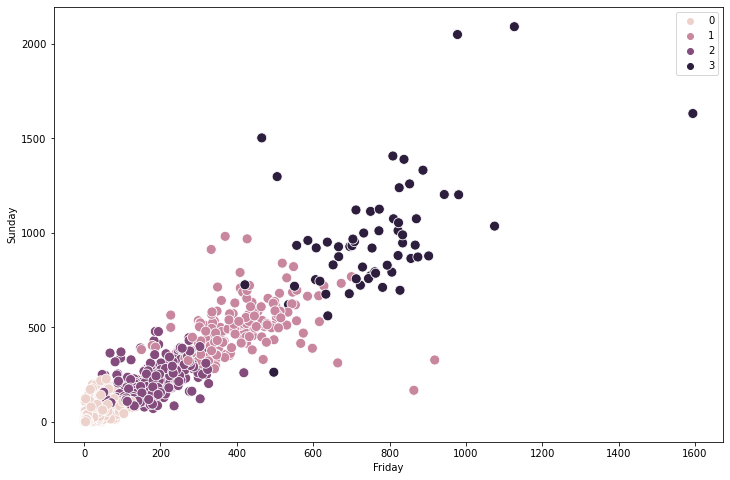

In [22]:
# Plot the clusters for the "Friday" and "Sunday" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Friday'], y=df['Sunday'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Friday') 
plt.ylabel('Sunday') 
plt.show()

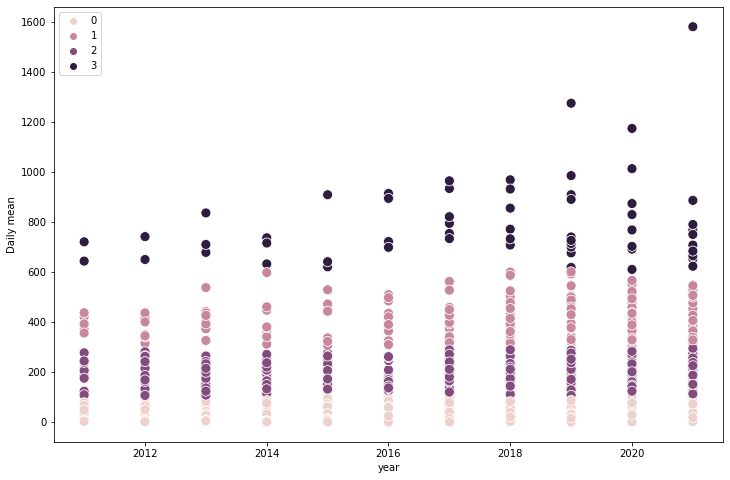

In [25]:
# Plot the clusters for the "Year" and "Daily mean" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year'], y=df['Daily mean'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('year') 
plt.ylabel('Daily mean') 
plt.show()

In [21]:
df.loc[df['clusters'] == 3, 'cluster'] = 'light purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df.groupby('cluster').agg({'Daily mean':['mean', 'median'], 
                         'Weekend mean':['mean', 'median'], 
                         'Weekday mean':['mean', 'median'],
                          'Thursday':['mean', 'median']})

Daily mean         Weekend mean         Weekday mean          \
                    mean  median         mean  median         mean  median   
cluster                                                                      
dark purple   176.038760  165.08   187.668221  179.31   160.091617  150.76   
light purple  795.040492  740.68   857.326721  804.86   717.183443  668.89   
pink           27.950957   19.22    30.748517   22.41    24.245242   14.33   
purple        416.913450  411.35   450.211813  436.61   373.404269  368.74   

                Thursday          
                    mean  median  
cluster                           
dark purple   160.402588  153.53  
light purple  707.059016  684.09  
pink           23.316480   12.73  
purple        376.331579  369.03

The light purple has the best stats in all categories, followed by the purple. This makes sense because these two groups are consecutive. I have the impression that this analysis is not so ideal for my dataset, since I do not get a lot of new insights. It seems that the linear regression analysis fits better. 
For further insights, I would suggest using categorical variables again and checking its patterns over time. 